In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🛒 Superstore Sales Analysis
This project analyzes Superstore's historical sales data to derive insights on:

- 📁 Category and Sub-Category performance  
- 🌍 Regional and Segment-based profit trends  
- 💸 The impact of discount on profitability  
- 📈 Time-series sales trend over months  


## 🧹 Data Cleaning & Exploration
We check the structure of the data, missing values, column types, and date ranges.


In [40]:


print("📊 Data Analysis with Pandas")

# Load the dataset
df = pd.read_csv("train.csv")  # make sure the file name matches your actual file

# Show first few rows
print("\n📌 HEAD:")
print(df.head())

# Show first few rows
print("\n📌 TAIL:")
print(df.tail())

# Dataset info
df.info()  # this already prints, so no need to wrap with print()

# Check for missing values
print("\n📌 MISSING VALUES:")
print(df.isnull().sum())

# Check column names
print("\n📌 COLUMNS:")
print(df.columns)




📊 Data Analysis with Pandas

📌 HEAD:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Cod

In [ ]:
# Check Unique Values (for Category & Region etc.)
print("\n📌 UNIQUE VALUES:")
print("Unique Categories:", df['Category'].unique())
print("Unique Sub-Categories:", df['Sub-Category'].unique())
print("Unique Regions:", df['Region'].unique())
print("Ship Modes:", df['Ship Mode'].unique())

# Convert Order Date to DateTime Format
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True, errors='coerce')

# Show min & max order dates
print("\n📌 ORDER DATE RANGE:")
print("From:", df["Order Date"].min(), "To:", df["Order Date"].max())
# Create profit column using assumption
df["Assumed Cost"] = df["Sales"] * 0.70
df["Profit"] = df["Sales"] - df["Assumed Cost"]


📌 UNIQUE VALUES:
Unique Categories: ['Furniture' 'Office Supplies' 'Technology']
Unique Sub-Categories: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
Unique Regions: ['South' 'West' 'Central' 'East']
Ship Modes: ['Second Class' 'Standard Class' 'First Class' 'Same Day']

📌 ORDER DATE RANGE:
From: 2015-01-03 00:00:00 To: 2018-12-30 00:00:00


✔️ Category & Sub-Category Profit

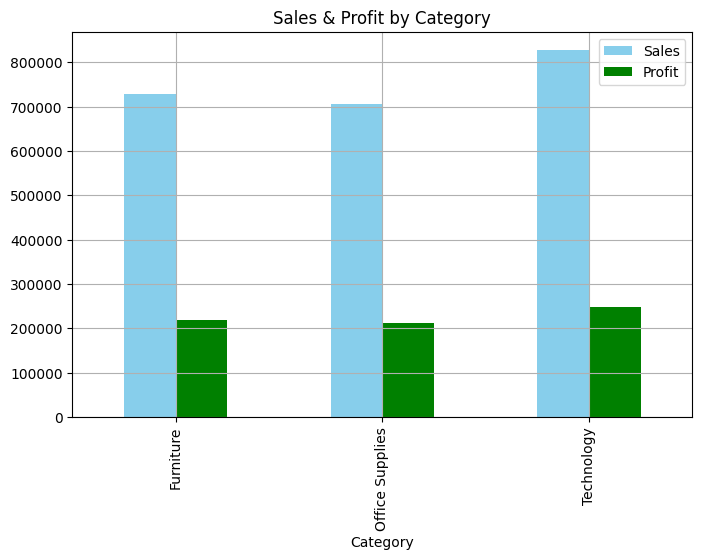

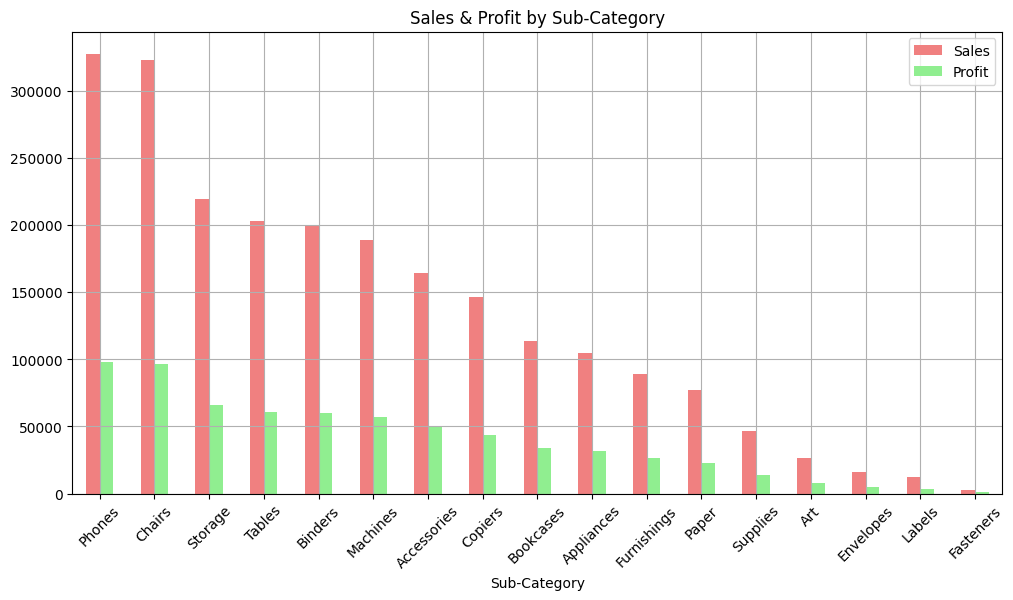

In [46]:
# Category-wise Sales and Profit
cat_summary = df.groupby("Category")[["Sales", "Profit"]].sum()

cat_summary.plot(kind="bar", figsize=(8,5), color=["skyblue", "green"])
plt.title("Sales & Profit by Category")
plt.grid(True)
plt.show()

# Sub-Category-wise
subcat_summary = df.groupby("Sub-Category")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False)
subcat_summary.plot(kind="bar", figsize=(12,6), color=["lightcoral", "lightgreen"])
plt.title("Sales & Profit by Sub-Category")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 🔍 Category & Sub-Category Analysis
- Technology is the highest revenue + profit-generating category.
- Tables have high sales but very low or negative profit.


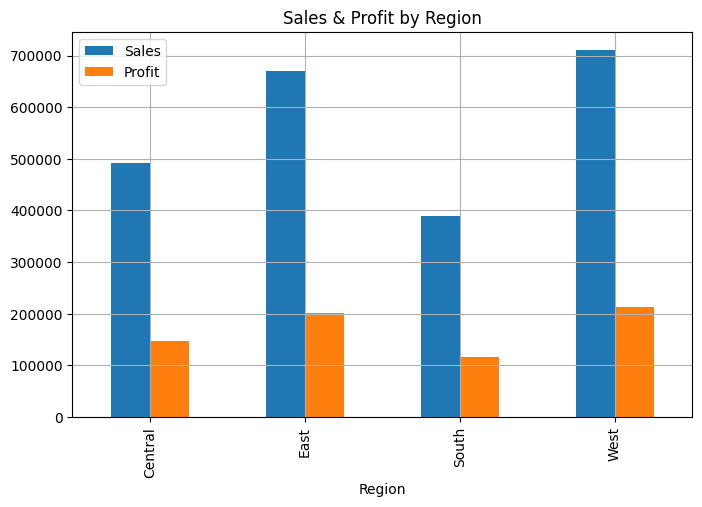

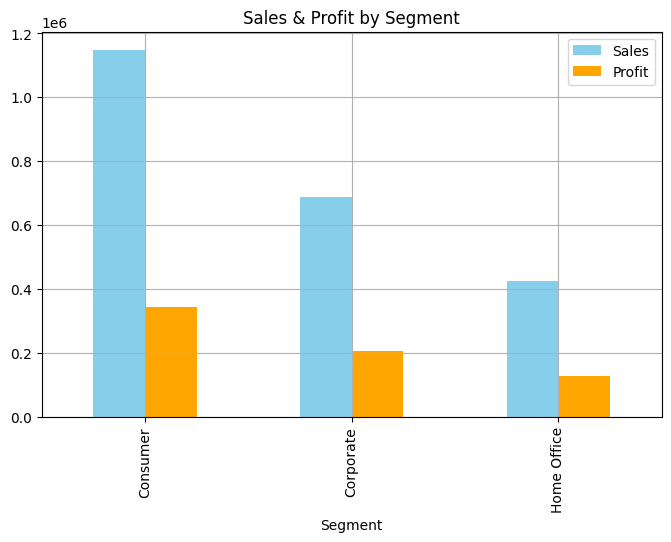

In [47]:
# Region-wise
region = df.groupby("Region")[["Sales", "Profit"]].sum()
region.plot(kind="bar", figsize=(8,5))
plt.title("Sales & Profit by Region")
plt.grid(True)
plt.show()

# Segment-wise
segment = df.groupby("Segment")[["Sales", "Profit"]].sum()
segment.plot(kind="bar", figsize=(8,5), color=["skyblue", "orange"])
plt.title("Sales & Profit by Segment")
plt.grid(True)
plt.show()


## 🌍 Region & Segment Analysis
- West region performs the best overall.
- Consumer segment is most profitable.


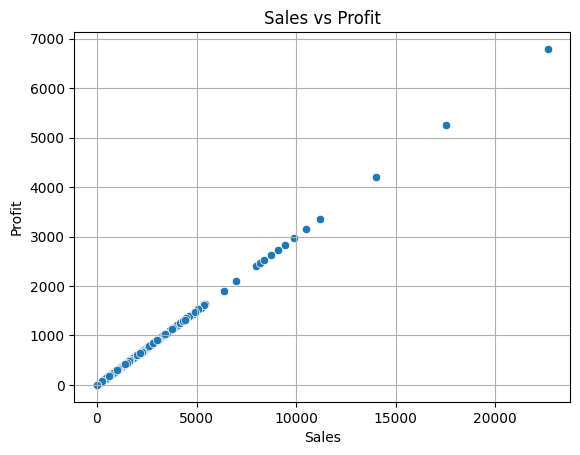

In [49]:
sns.scatterplot(x="Sales", y="Profit", data=df)
plt.title("Sales vs Profit")
plt.grid(True)
plt.show()


## 💸 Discount Impact
- High discount leads to lower profit.
- Negative correlation observed between discount and profitability.


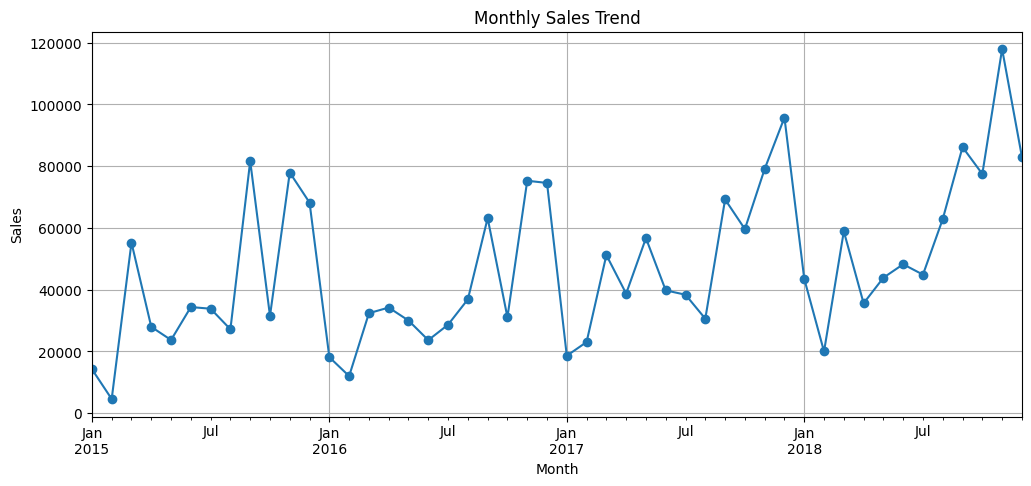

In [50]:
df["Month"] = df["Order Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Sales"].sum()

monthly_sales.plot(figsize=(12, 5), marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


## 📈 Monthly Sales Trend
- Q4 (Oct–Dec) shows consistent spikes.
- Sales increase around holiday seasons.


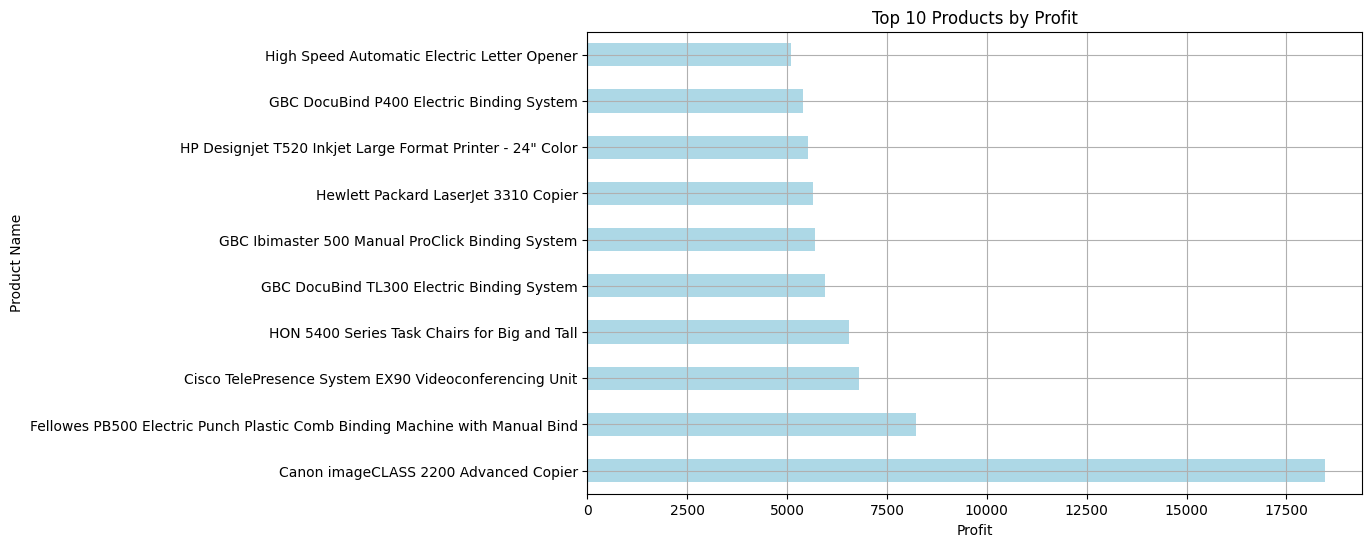

In [51]:
top_products = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)

top_products.plot(kind="barh", figsize=(10,6), color="lightblue")
plt.title("Top 10 Products by Profit")
plt.xlabel("Profit")
plt.grid(True)
plt.show()


## 🥇 Top Performing Products
- These products contribute significantly to profit.
- Can be pushed more in marketing campaigns.


## 📌 Final Insights
- 📦 Technology is the most profitable category.
- ⚠️ Tables and Bookcases have poor profit margins.
- 🌍 West region & Consumer segment are most successful.
- 💸 High discounts reduce profit significantly.
- 📈 Q4 shows sales spikes — leverage for marketing campaigns.
